<h1>Desafio do Módulo 1 do Bootcamp de Datascience da Alura</h1>

<p>Para esse bootcamp iremos analisar a base de dados BRASIL.IO da COVID-19 para tentarmos entender se há diferença na taxa de mortalidade da doença para diferentes regiões e se sim quais fatores podem explicar essa diferença. Para isso levantaremos algumas hipóteses e iremos testá-las com os dados que conseguirmos obter.</p> 

In [1]:
#Reading files

import pandas as pd 

file_path='../dados/caso.csv'

df=pd.read_csv(file_path)

#Cleaning data and creating aux columns

df['date']=pd.to_datetime(df['date'])

df['state_line']=df.apply(lambda row: 1 if row['city_ibge_code']<100 else 0,axis=1)

df.head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,state_line
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,1
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223,1
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224,1
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224,1
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224,1


<h2>Taxa de mortalidade por Estado e Município</h2>

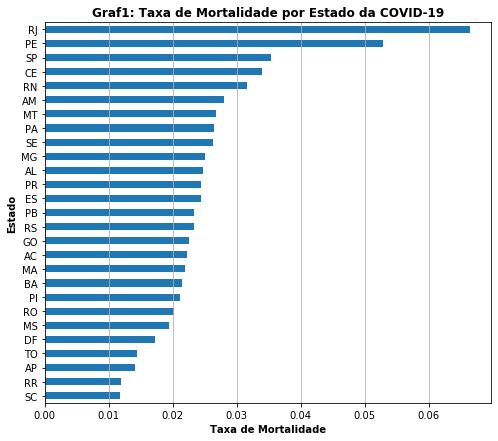

In [19]:
#Death rate by state

df_death_rate=df[(df.state_line==1) & (df.is_last==True)][['state','death_rate']]

ax=(df_death_rate
    .sort_values(by='death_rate',ascending=True)
    .plot(x='state',y='death_rate',kind='barh',figsize=(8,7)))

ax.xaxis.grid(True)
ax.get_legend().remove()

ylabel=ax.set_xlabel('Taxa de Mortalidade',fontweight='bold')
xlabel=ax.set_ylabel('Estado',fontweight='bold')
title=ax.set_title('Graf1: Taxa de Mortalidade por Estado da COVID-19'
    ,fontweight='bold'
    ,fontsize='large')





<p>Observamos acima que a taxa de mortalidade por estado varia consideravelmente, com o estado do Rio de Janeiro tendo uma taxa de mortalidade duas vezes maior que o Estado de São Paulo e <b> mais de seis vezes </b> o de Santa Catarina.</p>
<br>
<p>Entender essas diferenças é importante pois o Rio de Janeiro é um estado populoso e caso a taxa de mortalidade na região fosse menor mais vidas teriam sido salvas.</p>
<br>
<p>Mas antes de assumir proseguir com a análise devemos fazer algumas hipóteses sobre o que pode explicar essa diferença.</p>
<h2>Hipóteses</h2>
<ul>
<li>Os estados que registraram os primeiros casos tiveram dificulade para reagir devido a falta de conhecimento sobre a doença.</li>
<li>Estados que investem mais em saúde tiveram taxas de mortalidade menores.</li>
</ul>




<h3>Primeira Hipótese: Estados ou regiões que registraram os primeiros casos primeiro tiveram maior dificulade em combater a COVID-19.</h3>

(737475.0, 737509.0)

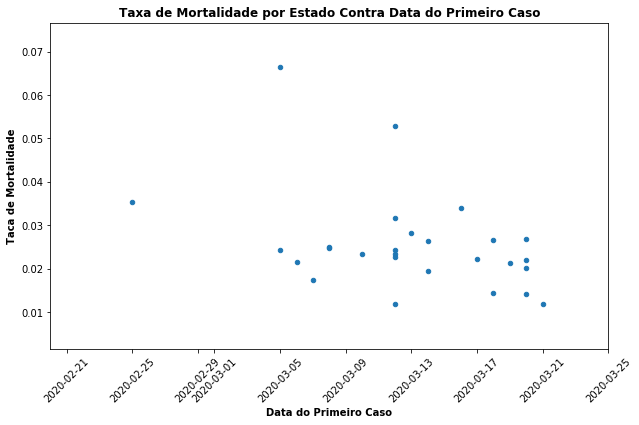

In [5]:
df_first_case=df[(df.state_line==1) & (df.order_for_place==1)][['date','state']].sort_values(by='date')

df_merged=pd.merge(df_death_rate,
            df_first_case,
            how='left',
            left_on='state',
            right_on='state')

ax_2=df_merged.plot.scatter(x='date',y='death_rate',rot=45,figsize=(10,6))
ax_2.set_xlabel('Data do Primeiro Caso',fontweight='bold')
ax_2.set_ylabel('Taca de Mortalidade',fontweight='bold')
title=ax_2.set_title('Taxa de Mortalidade por Estado Contra Data do Primeiro Caso'
    ,fontweight='bold'
    ,fontsize='large')

ax_2.set_xlim(pd.to_datetime('2020-02-20'),pd.to_datetime('2020-03-25'))

<p>Por estado parece ter uma relação negativa entre a data do primeiro caso e a taxa de mortalidade. Vamos analisar por Estado para termos uma visão mais granular.</p>

Número de municípios com taxa de mortalidade menor que 0.5: 5582


(0, 0.1)

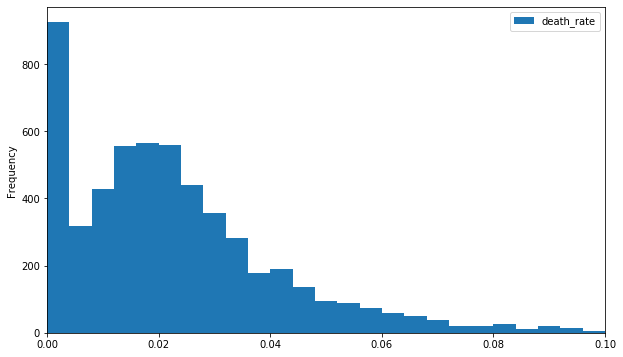

In [43]:
#Death rate by city

df_death_rate_city=df[(df.state_line!=1) & (df.is_last==True)][['city_ibge_code','city','death_rate','order_for_place']]

df_death_rate_city=df_death_rate_city[df_death_rate_city.death_rate<0.5]

print(f'Número de municípios com taxa de mortalidade menor que 0.5: {len(df_death_rate_city)}')

ax_3=df_death_rate_city.plot(y='death_rate',kind='hist',bins=100,figsize=(10,6))
ax_3.set_xlim(0,0.1)

(737485.0, 737509.0)

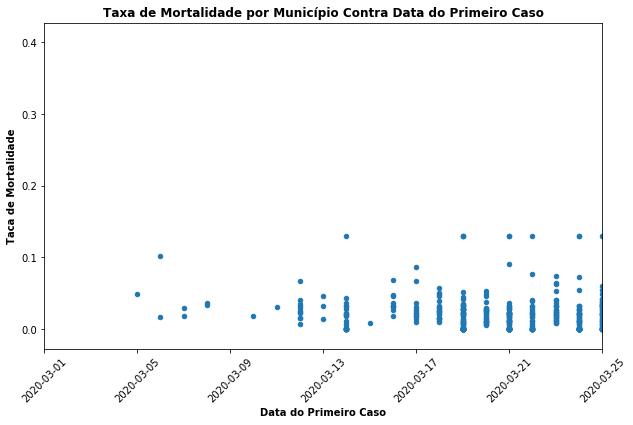

In [47]:
df_first_case_city=df[(df.state_line!=1) & (df.order_for_place==1)][['date','city_ibge_code','city']].sort_values(by='date')

df_merged2=pd.merge(df_death_rate_city,
                    df_first_case_city,
                    how='left',
                    left_on='city_ibge_code',
                    right_on='city_ibge_code')

ax_4=df_merged2.plot.scatter(x='date',y='death_rate',rot=45,figsize=(10,6))
ax_4.set_xlabel('Data do Primeiro Caso',fontweight='bold')
ax_4.set_ylabel('Taca de Mortalidade',fontweight='bold')
title=ax_4.set_title('Taxa de Mortalidade por Município Contra Data do Primeiro Caso'
    ,fontweight='bold'
    ,fontsize='large')

ax_4.set_xlim(pd.to_datetime('2020-03-01'),pd.to_datetime('2020-03-25'))

<p>Por cidade observamos uma grande variação da taxa de mortalidade por estado, mas não parece ser correlacionado com a data do primeiro caso.<p>